# Weekly Assignment 2: matplotlib


### Overall instructions:

There are four tasks as part of this assignment, all described in this notebook.

For parts 1, 2, and 4, you will write code in this notebook, each of which will create a plot.

For part 3, you must paste a URL, which will point to the page you create using github pages.

To submit, please run all cells in this notebook, save it as an HTML or PDF file, and upload both the html/pdf file AND the .ipynb file (this notebook) to Canvas. To save the notebook as an html/pdf file, select the File menu from within the notebook itself, and choose "Save and Export Notebook As", and then choose the desired format.

In addition, for Part 4, you will need to upload a zipfile as described in that section.

In summary, you should submit:
- this notebook as a .ipynb file
- this notebook exported as an HTML or PDF file
- a zipfile as described in Part 4

Please note: it is your responsibility to make sure that you submit the approprite files, and that your code works when you submit. To make sure things are working, we recommend you use Kernel > Restart Kernel, and then Run > Run All Cells, before you export or upload your submission. If you are missing files, or your code does not run properly, points will be deducted.


## Task 1

Please use this notebook to show your work in recreating the first visualizations from the second part of the first lab (the Tableau lab). Specifically, please try to reproduce the first figure (The Bechdel Test Over Time) from this article as closely as you can: https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/

Target figure:

![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/betchdel.png)

In [138]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from matplotlib.ticker import PercentFormatter

In [3]:
# Load the data from movies_independent_part_2.csv using pandas
data = pd.read_csv('movies_independent_part_2.csv')

In [14]:
# Create the first visualization (The Bechdel Test Over Time)
# You are free to use any workflow you like, but some suggested steps are given below:

In [6]:
# Suggested steps:

# 1. Inspect the data to see if you need to worry about NaNs, etc.
print(data.isnull().sum())

Unnamed: 0           0
year                 0
imdb                 0
title                0
test                 0
clean_test           0
binary               0
budget               0
domgross            17
intgross            11
code                 0
budget_2013$         0
domgross_2013$      18
intgross_2013$      11
period code        179
decade code        179
director             3
director_gender      3
genre                3
rating               3
country              3
language             4
dtype: int64


In [28]:
# 2. For each year, count the number of films with each test result (clean_test)
print(data['clean_test'].unique())
#print number of films with each test result for each year
print(data.groupby(['year', 'clean_test']).size())



['notalk' 'ok' 'men' 'nowomen' 'dubious']
year  clean_test
1970  ok             1
1971  men            1
      notalk         4
1972  notalk         2
      ok             1
                    ..
2013  dubious        9
      men           15
      notalk        23
      nowomen        6
      ok            46
Length: 191, dtype: int64


In [49]:
# 3. Combine the counts into the 5-year buckets used in the visualization
count = data.groupby(['year', 'clean_test']).size().unstack().fillna(0)

#grouping them 
count = count.groupby((count.index // 5) * 5).sum()

In [50]:
# 4. Convert the counts per bucket into percentages
count = count.div(count.sum(axis=1), axis=0)


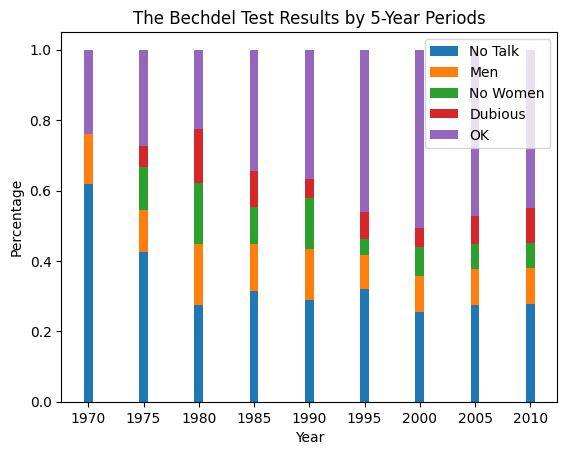

In [83]:
# 5. Create a new plot using plt.subplots()
# For each category, add a set of bars using ax.bar()
# Note that you can accomplish the stacking by telling it where to start using the "bottom" parameter

fig, ax = plt.subplots()

ax.bar(count.index, count['notalk'], label='No Talk')
ax.bar(count.index, count['men'], bottom=count['notalk'], label='Men')
ax.bar(count.index, count['nowomen'], bottom=count['notalk'] + count['men'], label='No Women')
ax.bar(count.index, count['dubious'], bottom=count['notalk'] + count['men'] + count['nowomen'], label='Dubious')
ax.bar(count.index, count['ok'], bottom=count['notalk'] + count['men'] + count['nowomen'] + count['dubious'], label='OK')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('The Bechdel Test Results by 5-Year Periods')
ax.legend()

# Show the plot
plt.show()



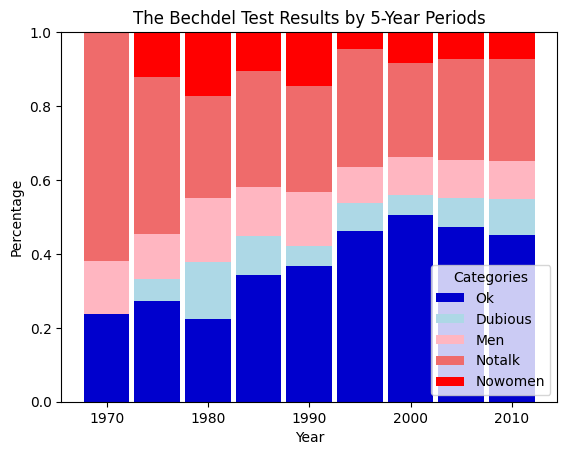

In [48]:
# Group by year and clean_test, calculate counts, and group by 5-year periods
count = data.groupby(['year', 'clean_test']).size().unstack().fillna(0)

# Group years into 5-year bins
count = count.groupby((count.index // 5) * 5).sum()

# Normalize the counts to percentages for each 5-year period
count = count.div(count.sum(axis=1), axis=0)

# Define the custom colors and category order
colors = {
    'ok': 'mediumblue',
    'dubious': 'lightblue',
    'men': 'lightpink',
    'notalk': '#EF6B6B',
    'nowomen': 'red'
}
categories = ['ok', 'dubious', 'men', 'notalk', 'nowomen']

# Create a stacked bar chart
fig, ax = plt.subplots()

# Add each category as a bar, stacking them in the specified order
bottom = None
for category in categories:
    ax.bar(
        count.index, 
        count[category], 
        bottom=bottom, 
        label=category.capitalize(), 
        color=colors[category],
        width=4.5,
    )
    bottom = count[category] if bottom is None else bottom + count[category]

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Percentage') 
ax.set_title('The Bechdel Test Results by 5-Year Periods')
ax.legend(title='Categories')

# Show the plot
plt.show()


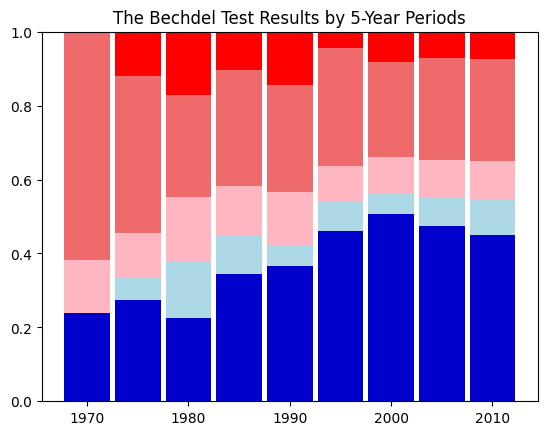

In [70]:
# fix up the colors, tick marks, and add the title

colors = {
    'ok': 'mediumblue',
    'dubious': 'lightblue',
    'men': 'lightpink',
    'notalk': '#EF6B6B',
    'nowomen': 'red'
}
categories = ['ok', 'dubious', 'men', 'notalk', 'nowomen']


fig, ax = plt.subplots()

bottom = None
for category in categories:
    ax.bar(
        count.index, 
        count[category], 
        bottom=bottom, 
        label=category.capitalize(), 
        color=colors[category],
        width=4.5,
    )
    bottom = count[category] if bottom is None else bottom + count[category]
    
ax.set_title('The Bechdel Test Results by 5-Year Periods')

# Show the plot
plt.show()

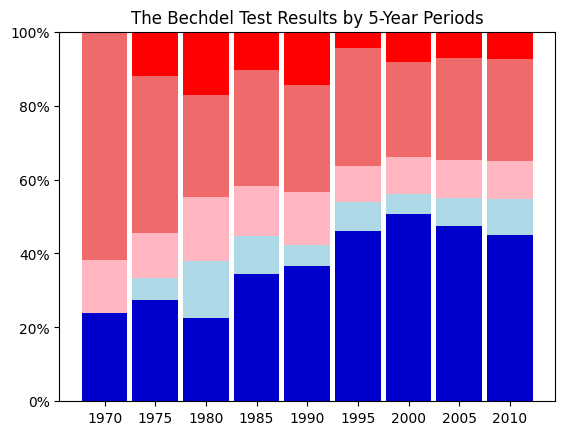

In [78]:
# manually add the text on the plot

# fix up the colors, tick marks, and add the title

colors = {
    'ok': 'mediumblue',
    'dubious': 'lightblue',
    'men': 'lightpink',
    'notalk': '#EF6B6B',
    'nowomen': 'red'
}
categories = ['ok', 'dubious', 'men', 'notalk', 'nowomen']


fig, ax = plt.subplots()

bottom = None
for category in categories:
    ax.bar(
        count.index, 
        count[category], 
        bottom=bottom, 
        label=category.capitalize(), 
        color=colors[category],
        width=4.5,
    )
    bottom = count[category] if bottom is None else bottom + count[category]

 # Add text annotations to each bar
    for bar, value in zip(bars, count_percentage[category]):
        if value > 0:  # Only add text if value is greater than 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center text horizontally
                bar.get_height() + (bottom[bar.get_x()] if bottom is not None else 0),  # Adjust for stack height
                f"{value:.1f}%",  # Format as percentage with 1 decimal place
                ha='center', va='bottom', fontsize=8
            )
    bottom = count_percentage[category] if bottom is None else bottom + count_percentage[category]

# Set x-axis ticks to display 5-year periods with custom labels
ax.set_xticks(count_percentage.index)
ax.set_xticklabels([f"{year} -\n'{(year + 4) % 100:02d}" for year in count_percentage.index])  # Ending year on a new line

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Set x-axis ticks to display 5-year periods
ax.set_xticks(count.index)
#ax.set_xticklabels([f"{year}-{year + 4}" for year in count.index])

# Add labels, title, and legend
ax.set_title('The Bechdel Test Results by 5-Year Periods')
#ax.legend(title='Categories')

# Show the plot
plt.show()

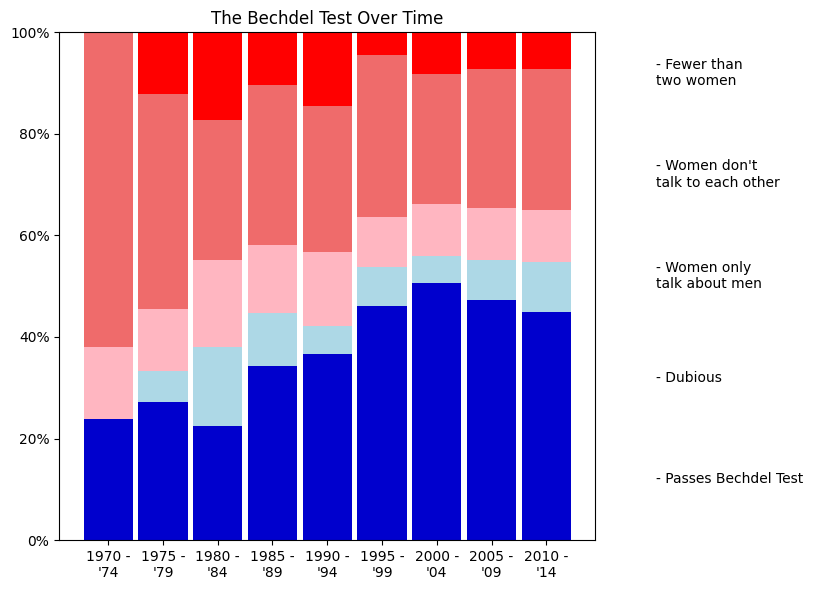

In [215]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define colors and categories
colors = {
    'ok': 'mediumblue',
    'dubious': 'lightblue',
    'men': 'lightpink',
    'notalk': '#EF6B6B',
    'nowomen': 'red'
}
categories = ['ok', 'dubious', 'men', 'notalk', 'nowomen']

# Assuming 'count' is your DataFrame with counts, already created from previous steps
# Format counts as percentages by multiplying by 100
count_percentage = count * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for better readability

# Initialize bottom for stacking
bottom = None
for category in categories:
    bars = ax.bar(
        count_percentage.index, 
        count_percentage[category], 
        bottom=bottom, 
        label=category.capitalize(), 
        color=colors[category],
        width=4.5,
    )
    bottom = count_percentage[category] if bottom is None else bottom + count_percentage[category]

# Set x-axis ticks to display 5-year periods with custom labels
ax.set_xticks(count_percentage.index)
ax.set_xticklabels([f"{year} -\n'{(year + 4) % 100:02d}" for year in count_percentage.index])  # Ending year on a new line

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_yticks(range(0, 101, 20))  # Tick marks from 0 to 100 in increments of 20
ax.set_yticklabels([f"{tick}%" for tick in range(0, 101, 20)])
ax.set_title('The Bechdel Test Over Time')

# Reverse the categories for label placement
reversed_categories = categories[::-1]

# Custom label names for each category, prefixed with a dash
custom_labels = {
    'ok': '- Passes Bechdel Test',
    'dubious': '- Dubious',
    'men': '- Women only\ntalk about men',
    'notalk': '- Women don\'t\ntalk to each other',
    'nowomen': '- Fewer than\ntwo women'
}

# Calculate the position for the manual labels on the right
text_x = count_percentage.index[-1] + 10  # Adjust as needed for your plot size

# Place labels on the plot in reverse order with custom styling
for i, category in enumerate(reversed_categories):
    ax.text(
        text_x,
        92 - i * 20,  # Lower the starting point by adjusting from 100 to 92
        custom_labels[category],  # Use customized label text with dashes
        fontsize=10,  # Customize the font size
        color='black',  # Customize text color
        va='center',
        ha='left',  # Align text horizontally to the left
    )

# Adjust layout to make room for manual text or legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Reduce plot size if needed

# Show the plot
plt.show()

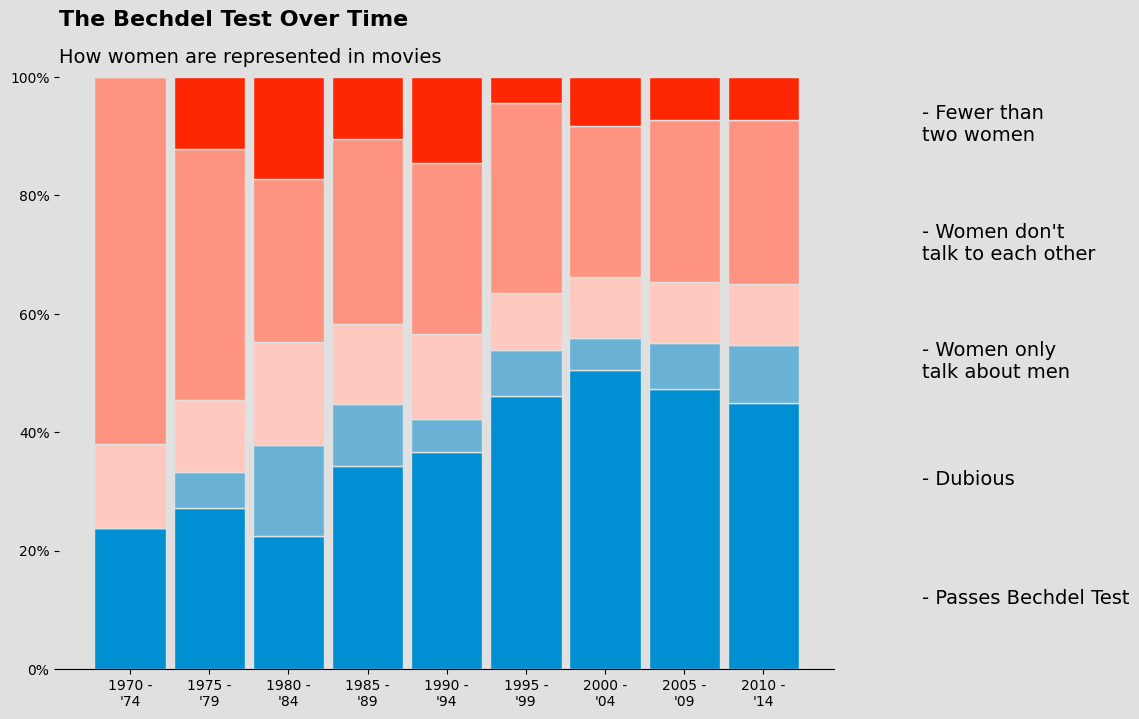

In [250]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define colors and categories
colors = {
    'ok': '#008FD3',
    'dubious': '#6AB2D5',
    'men': '#FFC9BF',
    'notalk': '#FE9381',
    'nowomen': '#FF2703'
}
categories = ['ok', 'dubious', 'men', 'notalk', 'nowomen']
count_percentage = count * 100

# Create the plot 
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#E0E0E0')  
ax.set_facecolor('#E0E0E0')  

# Initialize bottom for stacking
bottom = None
for category in categories:
    bars = ax.bar(
        count_percentage.index, 
        count_percentage[category], 
        bottom=bottom, 
        label=category.capitalize(), 
        color=colors[category],
        width=4.5,
        edgecolor='#E0E0E0', 
    )
    bottom = count_percentage[category] if bottom is None else bottom + count_percentage[category]

# Sets x-axis ticks to display 5-year periods with custom labels
ax.set_xticks(count_percentage.index)
ax.set_xticklabels([f"{year} -\n'{(year + 4) % 100:02d}" for year in count_percentage.index]) 

# Formats y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_yticks(range(0, 101, 20)) 
ax.set_yticklabels([f"{tick}%" for tick in range(0, 101, 20)])

# Add title and subtitle
ax.set_title('How women are represented in movies', fontsize=14, loc='left', pad=10)
ax.text(0, 1.08, 'The Bechdel Test Over Time', fontsize=16, ha='left', fontweight='bold', va='bottom', transform=ax.transAxes)

# Reverse the categories for label placement
reversed_categories = categories[::-1]
custom_labels = {
    'ok': '- Passes Bechdel Test',
    'dubious': '- Dubious',
    'men': '- Women only\ntalk about men',
    'notalk': '- Women don\'t\ntalk to each other',
    'nowomen': '- Fewer than\ntwo women'
}

# Calculate the position for the manual labels on the right
text_x = count_percentage.index[-1] + 10  
for i, category in enumerate(reversed_categories):
    ax.text(
        text_x,
        92 - i * 20,  
        custom_labels[category],  
        fontsize=14,  
        color='black', 
        va='center',
        ha='left',  
    )

# Remove the top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.subplots_adjust(top=0.85)  

# Show the plot
plt.show()

## Task 2: Improving the style of a figure

Here, we will create a basic bar chart for you. Your job is to make it look like the target image we will provide below. Please try to get as close as possible to the target image! If you can't figure something out, try searching online and/or read the matplotlib documentation.

In [98]:
# Load the data
df = pd.read_csv('data.csv', header=0, index_col=None)
df.head()

,condition,ROR,lowCI,highCI,Total,base_rate,Case,increased_rate,pop_estimate,ratio
0,Abnormal behavior,33.9,31.8,36.2,28421,0.002929,1036,0.106042,9769.684326,0.036452
1,Aggression,31.7,29.8,33.8,32013,0.003300,1089,0.111526,9764.578604,0.034017
2,Anger,24.8,22.8,27.0,21031,0.002168,589,0.058527,10063.760857,0.028006
3,Suicidal thoughts,21.5,20.3,22.9,52853,0.005448,1222,0.124749,9795.684324,0.023121
4,Crying,19.9,18.2,21.7,23462,0.002418,533,0.052475,10157.133150,0.022718


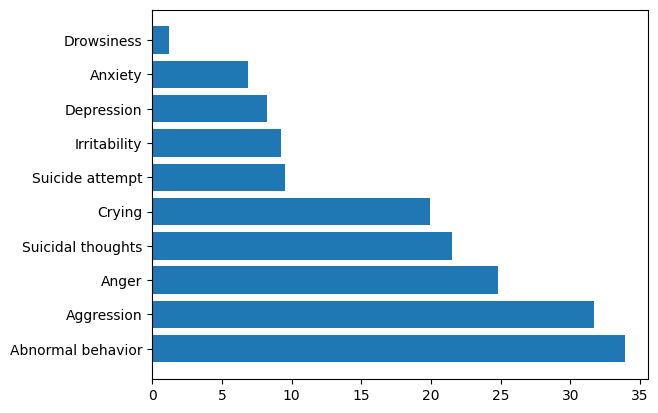

In [99]:
# Plot a basic bar chart with default stylings

fig, ax = plt.subplots()
ax.barh(df['condition'], df['ROR'])
plt.show();



This data is also plotted in a New York Times article (available here: https://www.nytimes.com/2024/01/09/health/fda-singulair-asthma-drug-warning.html), but with nicer aesthetics.

Here is the target image:

![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/montelukast.png)

Your job is to write matplotlib code to create the New York Times chart (or as close as you can get).

Remember when you are done to run all cells, and upload your notebook to Canvas



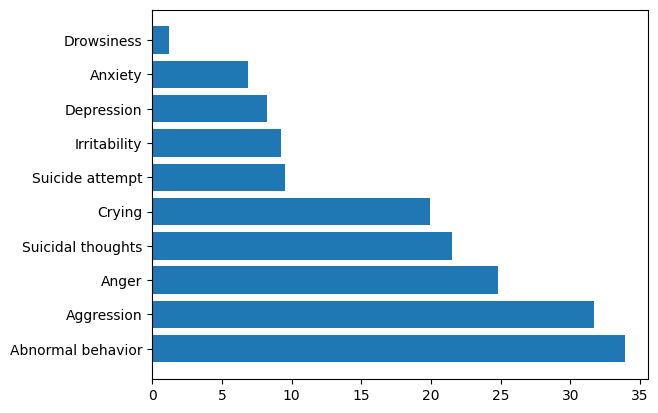

In [101]:
# Your code goes here

import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv('data.csv', header=0, index_col=None)
# Plot a basic bar chart with default stylings
fig, ax = plt.subplots()
ax.barh(df['condition'], df['ROR'])
plt.show()


/var/folders/pw/9ldx_pjj6sjfq59wv10lxdlm0000gn/T/ipykernel_35547/2233583958.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0', 'Same reporting rate as \n other drugs', '10 \ntimes', '20 \ntimes', '30 times \nmore likely'])


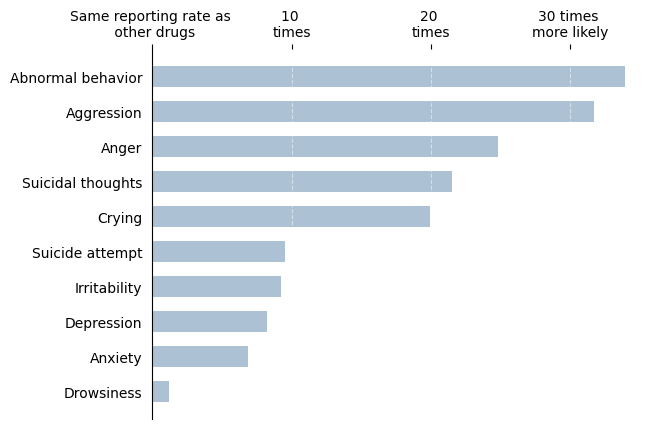

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv', header=0, index_col=None)
df.sort_values('ROR', ascending=True, inplace=True)

# Plot a basic bar chart with default stylings
fig, ax = plt.subplots()

bar_width = 0.6
ax.barh(
    df['condition'], 
    df['ROR'], 
    color='#ADC1D4',
    height = bar_width)

# Move x-axis ticks to the top
ax.xaxis.set_ticks_position('top')

# Remove y-axis ticks
ax.yaxis.set_ticks_position('none')

# only show every other x-axis tick (0,10,20,30)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# Add a grid for the x-axis
ax.xaxis.grid(True, linestyle='--', alpha=0.5, color='white')

#custom names for the x-axis ticks
ax.set_xticklabels(['0', 'Same reporting rate as \n other drugs', '10 \ntimes', '20 \ntimes', '30 times \nmore likely'])

#remove graph outline except y-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)




plt.show()


## Task 3: Github Pages

Using the instructions provided in the lab, create a github page (using github pages). Embed both of the above images you have made on that page, and submit a link to it. (Please make sure everything is set to be public).


### Put the link to your page with the two figures above here:

`<Insert URL>`

## Task 4: ChatGPT

For the last part of this assignment, we want you to experiment with using generative AI to make complex visualizations.

You should all have access to UM GPT (available here: https://umgpt.umich.edu/)

We want you to use UM GPT to try recreating (in matplotlib) the famous Napoleon's March figure by Minard, as shown below:


![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/minard.jpg)

Here are the steps we want you to follow in detail:
1. Using Chrome or Firefox, spend some time working with UM GPT, and see how well it is able to recreate the above figure, specifically using **matplotlib**. (You may find this challenging, but see how close you can get). Note that you may need to copy and paste the code into a notebook to see how well it is working.
2. When you are satisfied with your result, **paste the code that generates the final figure in the cell below, and run it**.
3. In addition, **save your UM GPT chat** to disk. Using your browser, select File > Save Page As..., and choose "Web Page, complete"
4. Try opening the .html file it saves, to make sure it shows your full chat history.
5. **Zip the files that it creates** (this should be one file with a .html extension, and a folder with approximately the same name).
6. Upload to Canvas the zipfile of your chat history, as well as this notebook, and a copy of this notebook saved as an .html file (see above)

Note that this question is more about effort than about getting everything perfect. Please put some thought into this, and get a sense of what works and what doesn't. However, we will also have a contest to see who is able to get the closest to the original image!

(If you would rather use another system other than UM GPT, that is okay. However, you need to be able to export your chat history somehow, which is not enabled by default in some of the best known systems (e.g., ChatGPT). If you can find a way to export your chat history, then you are welcome to use whichever generative AI system you like. However, please do not upload or provide any code to the system you use. See how far you can get just by coaxing it into doing what you want. In addition, the code it generates **must use matplotlib to create the figure**).

In [27]:
# Your final code goes here:
